Handwritten digits classification using neural network - Practice

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the required data of Handwritten digits from keras datasets.

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
len(x_train), len(x_test)

(60000, 10000)

In [4]:
# x_train = 60000 images of 28x28 pixels each
# y_train = 60000 labels (0-9) for each image
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_train[0] #represents the first image in the training dataset

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

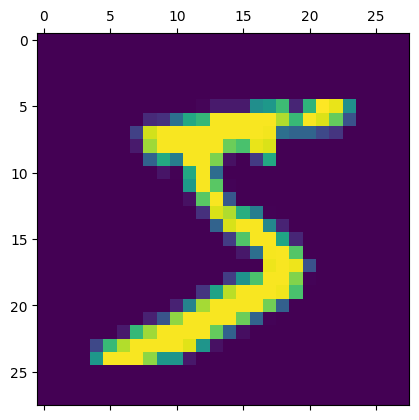

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

np.uint8(5)

In [29]:
# Scalling down the data to range 0-1
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [60]:
# Flatten the 28x28 images into 1D array of 784 pixels
x_train_flattend = x_train_scaled.reshape(len(x_train_scaled), 28*28)
x_test_flattend = x_test_scaled.reshape(len(x_test_scaled), 28*28)
x_train_flattend.shape, x_test_flattend.shape

((60000, 784), (10000, 784))

In [61]:
x_train_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Objective1: To Build simple neural network model without hidden layers to classify the digits.

In [64]:
# Addition of output layer with 10 neurons
model_10 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compiling the model using Adam optimizer and sparse categorical crossentropy loss function
model_10.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# epochs = number of times the model will see the entire dataset during training
model_10.fit(x_train_flattend, y_train, epochs=5)

Epoch 1/5


d:\Development\ML\Deep Learning\DL Practice\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.8778 - loss: 0.4693
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.9151 - loss: 0.3039
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.9201 - loss: 0.2834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.9236 - loss: 0.2731
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9252 - loss: 0.2667


In [65]:
# Evaluating the model on test data
model_10.evaluate(x_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.9275 - loss: 0.2650


[0.265033096075058, 0.9275000095367432]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


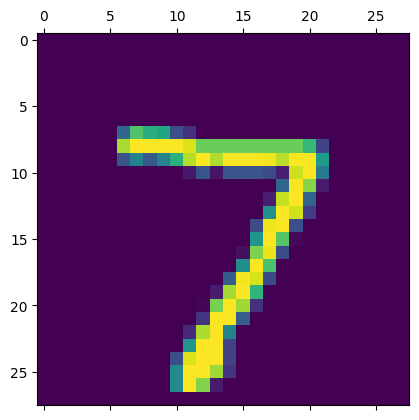

In [66]:
y_predicted = model_10.predict(x_test_flattend[0:1])
plt.matshow(x_test[0])

In [67]:
np.argmax(y_predicted[0]).item() # to get the index of highest probability

7

Creating the Confusion Matrix to evaluate the model performance.

In [68]:
y_predicted = model_10.predict(x_test_flattend)
y_predicted_labels = [np.argmax(i).item() for i in y_predicted]
y_predicted_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


[7, 2, 1, 0, 4]

Text(50.722222222222214, 0.5, 'Truth')

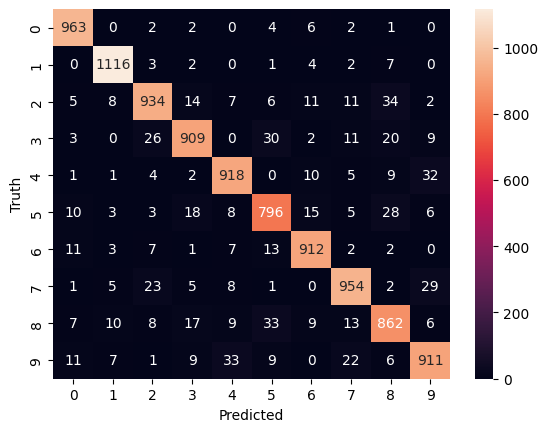

In [69]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Objective2: To Build neural network model with hidden layers to classify the digits.

In [70]:
# Addition of hidden layer with 200 neurons
model_200 = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'), # hidden layer with 200 neurons
    keras.layers.Dense(10, activation='sigmoid'), # no need to specify input shape for subsequent layers
])

# Compiling the model using Adam optimizer and sparse categorical crossentropy loss function
model_200.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# epochs = number of times the model will see the entire dataset during training
model_200.fit(x_train_flattend, y_train, epochs=10)

Epoch 1/10


d:\Development\ML\Deep Learning\DL Practice\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9331 - loss: 0.2338
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9707 - loss: 0.0973
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0653
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9851 - loss: 0.0470
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9890 - loss: 0.0343
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9908 - loss: 0.0277
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9940 - loss: 0.0201
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9948 - loss: 0.0172
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9955 - loss: 0.0140
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9964 - loss: 0.0117


In [71]:
model_200.evaluate(x_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9778 - loss: 0.0839


[0.08390690386295319, 0.9778000116348267]

In [74]:
y_predicted = model_200.predict(x_test_flattend)
y_predicted_labels = [np.argmax(i).item() for i in y_predicted]
y_predicted_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[7, 2, 1, 0, 4]

Text(50.722222222222214, 0.5, 'Truth')

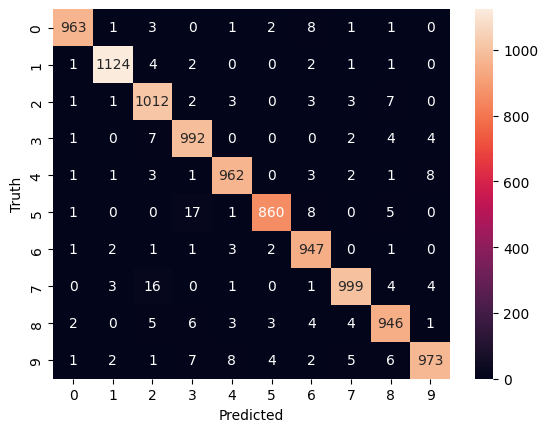

In [77]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

We can use inbuilt function of keras to flatten the images.

In [76]:
model_d = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_d.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_d.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10


d:\Development\ML\Deep Learning\DL Practice\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9212 - loss: 0.2803
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9624 - loss: 0.1281
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0899
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9795 - loss: 0.0667
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0520
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9868 - loss: 0.0422
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9900 - loss: 0.0338
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9911 - loss: 0.0285
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9931 - loss: 0.0234
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9941 - loss: 0.0195


In [81]:
# No need to flatten the images as Flatten layer is already added in the model
model_d.evaluate(x_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9786 - loss: 0.0770


[0.07703142613172531, 0.978600025177002]

In [83]:
y_predicted = model_d.predict(x_test_scaled)
y_predicted_labels = [np.argmax(i).item() for i in y_predicted]
y_predicted_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[7, 2, 1, 0, 4]

Text(50.722222222222214, 0.5, 'Truth')

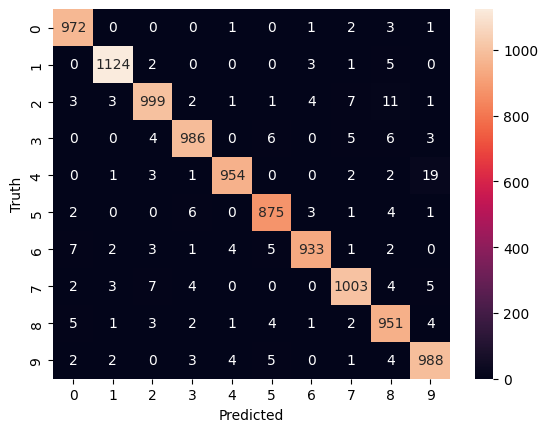

In [84]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')